In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# CSV 파일 불러오기
df = pd.read_csv('save_total.csv')

# 이진분류X /변수선택 적용 전 KNN 모델평가 (K=17) 

In [3]:
# 특성과 레이블 분리
X=df.drop('quality',axis=1)
y = df['quality'] 

In [4]:
# 데이터를 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# KNN 모델 훈련 및 성능 평가 (K=17)
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)

print(f'Test Set Accuracy: {accuracy:.2%}')

Test Set Accuracy: 61.40%


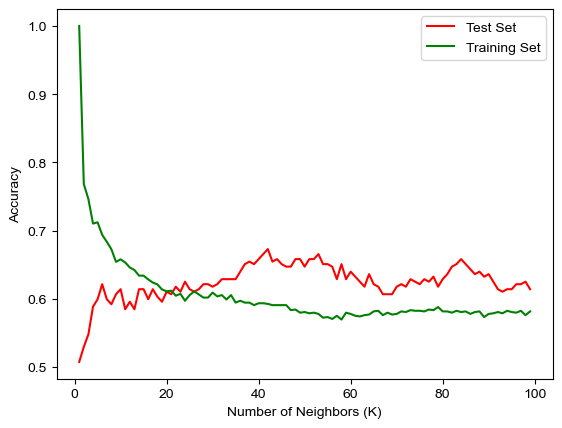

In [6]:
# 폰트 설정
plt.rcParams['font.family'] = 'Arial'

# K 값에 따른 성능 그래프
acc_test = []
acc_train = []

for i in range(1, 100):
    knn_k = KNeighborsClassifier(n_neighbors=i)
    knn_k.fit(X_train, y_train)
    acc_test.append(knn_k.score(X_test, y_test))
    acc_train.append(knn_k.score(X_train, y_train))

plt.plot(range(1, 100), acc_test, 'r', label='Test Set')
plt.plot(range(1, 100), acc_train, 'g', label='Training Set')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [7]:
# 성능평가표 (Confusion Matrix)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=True))

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         4
           4       1.00      0.00      0.00        11
           5       0.66      0.74      0.70       120
           6       0.55      0.63      0.59       103
           7       0.65      0.42      0.51        31
           8       1.00      0.00      0.00         3

    accuracy                           0.61       272
   macro avg       0.81      0.30      0.30       272
weighted avg       0.64      0.61      0.59       272



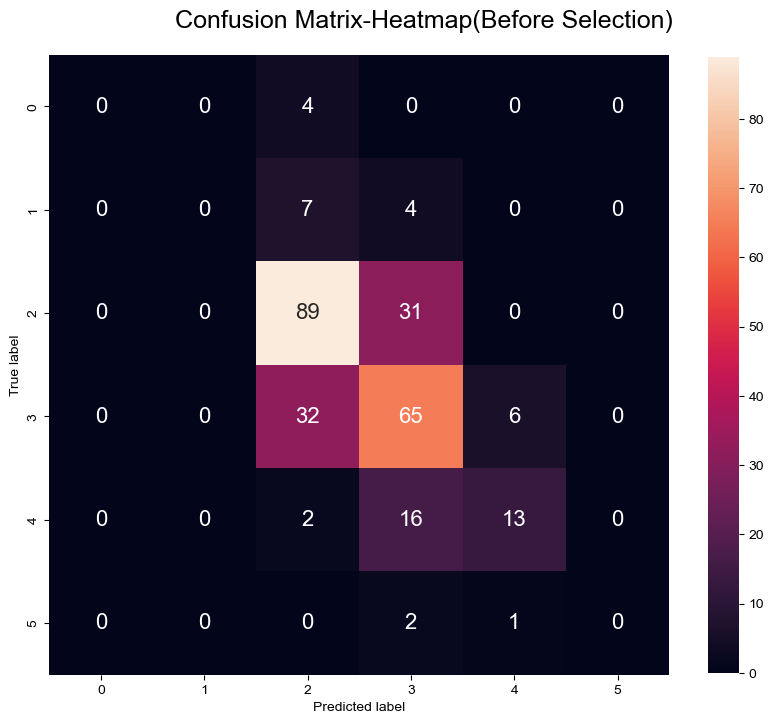

In [8]:
# 폰트 설정
plt.rcParams['font.family'] = 'Arial'

# Confusion Matrix 플로팅
plt.figure(figsize=(10, 10))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True,  annot_kws={'size': 16}, cbar_kws={'shrink': 0.8})

plt.xlabel('Predicted label')
plt.ylabel('True label')

# 제목 추가
plt.suptitle('Confusion Matrix-Heatmap(Before Selection)', fontsize=18, y=0.85)
plt.show()


#### 다중 분류 모델로 ROC Curve 를 그리는 경우: 이진화 과정이 필수적임

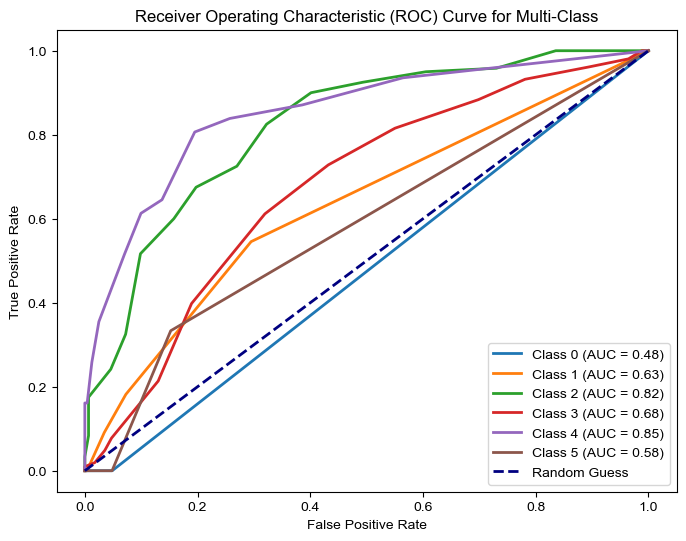

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# CSV 파일 불러오기
df = pd.read_csv('save_total.csv')

# 특성과 레이블 분리
X = df.drop('quality', axis=1)  
y = df['quality']

# 데이터를 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다중 클래스에 대해 레이블 이진화
y_train_bin = label_binarize(y_train, classes=np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# One-vs-Rest 접근 방식으로 KNN 모델 훈련
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=17))
knn.fit(X_train, y_train_bin)

# 각 클래스에 대한 ROC 커브 계산
fpr = dict()
tpr = dict()
roc_auc = dict()

y_scores = knn.predict_proba(X_test)

for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 폰트 설정
plt.rcParams['font.family'] = 'Arial'

# 각 클래스에 대한 ROC 커브 그리기
plt.figure(figsize=(8, 6))

for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()

# 이진분류X /변수선택 적용한 KNN 모델평가 (K=13)

In [10]:
X1 = df[['alcohol', 'sulphates', 'volatile acidity', 'chlorides', 'pH', 'total sulfur dioxide']] 
y = df['quality'] 

In [11]:
# 데이터를 훈련 세트와 테스트 세트로 나누기
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [12]:
# KNN 모델 훈련 및 성능 평가 (K=13)
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X1_train, y_train)
accuracy = knn.score(X1_test, y_test)

print(f'Test Set Accuracy: {accuracy:.2%}')

Test Set Accuracy: 62.50%


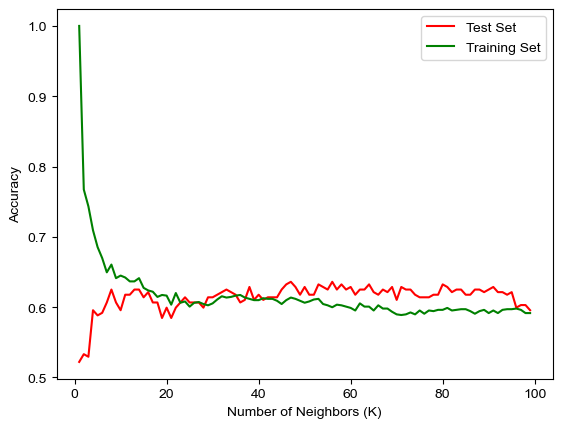

In [13]:
# 폰트 설정
plt.rcParams['font.family'] = 'Arial'

# K 값에 따른 성능 그래프
acc_test = []
acc_train = []

for i in range(1, 100):
    knn_k = KNeighborsClassifier(n_neighbors=i)
    knn_k.fit(X1_train, y_train)
    acc_test.append(knn_k.score(X1_test, y_test))
    acc_train.append(knn_k.score(X1_train, y_train))

plt.plot(range(1, 100), acc_test, 'r', label='Test Set')
plt.plot(range(1, 100), acc_train, 'g', label='Training Set')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [14]:
# 성능평가표 (Confusion Matrix)
y_pred = knn.predict(X1_test)
print(classification_report(y_test, y_pred, zero_division=True))

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         4
           4       0.00      0.00      1.00        11
           5       0.70      0.77      0.73       120
           6       0.56      0.62      0.59       103
           7       0.56      0.45      0.50        31
           8       1.00      0.00      0.00         3

    accuracy                           0.62       272
   macro avg       0.64      0.31      0.47       272
weighted avg       0.61      0.62      0.64       272



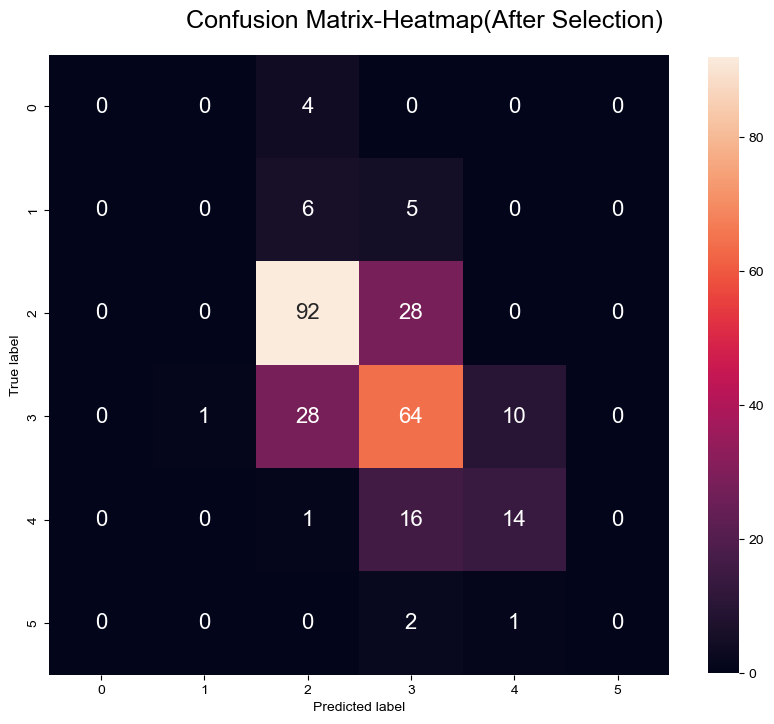

In [15]:
# 폰트 설정
plt.rcParams['font.family'] = 'Arial'

# Confusion Matrix 플로팅
plt.figure(figsize=(10, 10))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True,  annot_kws={'size': 16}, cbar_kws={'shrink': 0.8})

plt.xlabel('Predicted label')
plt.ylabel('True label')

# 제목 추가
plt.suptitle('Confusion Matrix-Heatmap(After Selection)', fontsize=18, y=0.85)

plt.show()

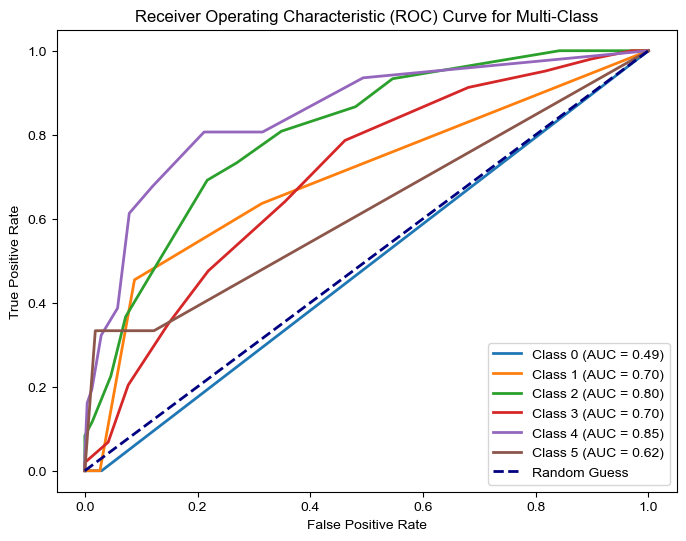

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# CSV 파일 불러오기
df = pd.read_csv('save_total.csv')

# 특성과 레이블 분리
X = df.drop('quality', axis=1)  
y = df['quality']

# 데이터를 훈련 세트와 테스트 세트로 나누기
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# 다중 클래스에 대해 레이블 이진화
y_train_bin = label_binarize(y_train, classes=np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# One-vs-Rest 접근 방식으로 KNN 모델 훈련
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=13))
knn.fit(X1_train, y_train_bin)

# 각 클래스에 대한 ROC 커브 계산
fpr = dict()
tpr = dict()
roc_auc = dict()

y_scores = knn.predict_proba(X1_test)

for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 폰트 설정
plt.rcParams['font.family'] = 'Arial'

# 각 클래스에 대한 ROC 커브 그리기
plt.figure(figsize=(8, 6))

for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()